$$ w_c = \argmin f(w_i,x_j) = \{ i \quad | \quad \| w_i - x_j \| \} $$
$$ d_{ic} = \| w_i - w_c \| $$
$$ s_i = e^{-\alpha d_i^2 t}, \quad \alpha \geqslant 0 $$
$$ w_i \leftarrow w_i + \beta s_i (x_j - w_i), \quad \beta \geqslant 0 $$

In [91]:
import math
import random

import numpy as np
from matplotlib import pyplot as plt

In [92]:
class SOM:
    def __init__(self, n_neurons, n_dim, alpha, beta) -> None:
        self.n_dim: int = n_dim
        self.n_neurons: int = n_neurons
        self.weights: np.ndarray = None
        self.alpha = alpha
        self.beta = beta

    def _init_weights(self, data: np.ndarray):
        min_xy = [np.min(data[:, 0]), np.min(data[:, 1])]
        max_xy = [np.max(data[:, 0]), np.max(data[:, 1])]

        wx = np.linspace(min_xy[0], max_xy[0], int(
            math.sqrt(self.n_neurons)), dtype='float32')
        wy = np.linspace(min_xy[1], max_xy[1], int(
            math.sqrt(self.n_neurons)), dtype='float32')
        WX, WY = np.meshgrid(wx, wy)

        self.weights = np.vstack([np.ravel(WX), np.ravel(WY)]).transpose()

    def fit(self, data: np.ndarray, n_iter: int) -> None:
        self._init_weights(data)
        for t in range(n_iter):
            x = random.choice(data)
            bmu_id = self._find_winner(x)
            self._update_weights(x, bmu_id, t+1)

    def _find_winner(self, x: np.ndarray) -> int:
        return np.argmin(np.apply_along_axis(lambda w: np.linalg.norm(x-w), 1, self.weights))

    def _update_weights(self, x: np.ndarray, bmu_id: int, t: int) -> None:
        bmu_w = self.weights[bmu_id]
        d = np.apply_along_axis(
            lambda w: np.linalg.norm(w-bmu_w), 1, self.weights)
        s = np.exp(-self.alpha*np.square(d)*t)
        self.weights += np.apply_along_axis(
            lambda w: self.beta*s*w, 0, x-self.weights)

In [93]:
def circle_cluster_gen(c: np.ndarray, r: float, n: int) -> np.ndarray:
    res = []
    for i in range(n):
        a = random.uniform(0, 2*math.pi)
        d = random.gauss(0, r)
        x = math.cos(a)*d+c[0]
        y = math.sin(a)*d+c[1]
        res.append([x, y])
    return np.array(res, dtype='float32')

In [94]:
data1 = circle_cluster_gen(np.array([-20, 0]), 5, 100)
data2 = circle_cluster_gen(np.array([20, 0]), 5, 100)

data = np.concatenate([data1, data2])

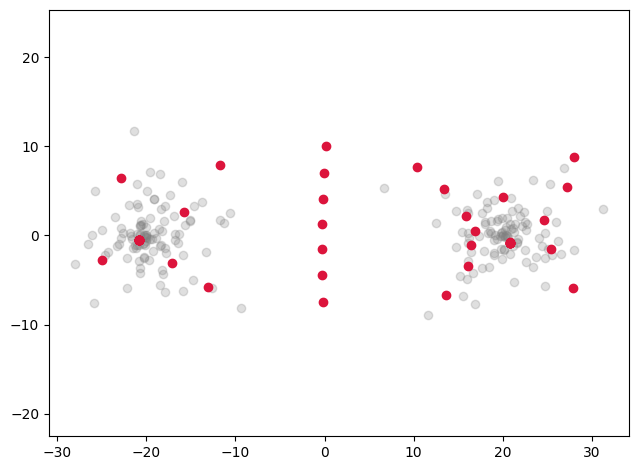

In [96]:
alpha = 1e-3
beta = 1e-1

model = SOM(49, 2, alpha, beta)
model.fit(data, n_iter=500)

plt.scatter(data[:, 0], data[:, 1], c='grey', alpha=0.25)
plt.scatter(model.weights[:, 0], model.weights[:, 1], c='crimson')

plt.tight_layout()
plt.axis('equal')
plt.show()